# Run following script to select points
Exit by pressing q
To identify regions to remove in still condition (no one home)

In [1]:
# !python camera_masking.py 

# Pre-process image

In [1]:
%load_ext autotime
%load_ext autoreload 
%autoreload 2

import cv2
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# sys.path.append('./src/')
from config import *
from utils import *
from visualization import *

time: 938 ms (started: 2023-04-09 11:33:10 +08:00)


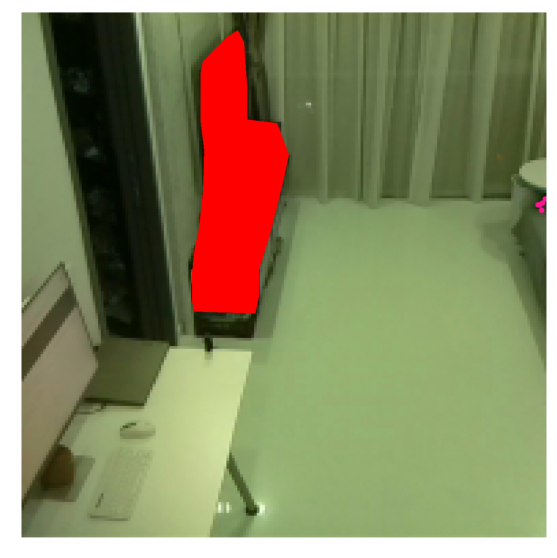

time: 516 ms (started: 2023-04-09 11:33:24 +08:00)


In [2]:
# Use fillPoly() function and give input as image, end points,color of polygon
dataset, image_name = 'background', 'still_cam'
pairs = pd.read_csv(os.path.join(DATA_DIR, dataset, image_name+'_points.csv'))
image = cv2.imread(os.path.join(DATA_DIR, dataset, image_name+'.jpg'))
src = image.copy()
src = cv2.fillPoly(src, pts=[pairs.values], color=(255, 0, 0))
plt.figure(figsize=(10, 10))
plt.imshow(src)
_ = plt.axis('off')

# Save the mask for masking out the regions for pose analysis
mask = np.zeros(image.shape, dtype="uint8")
mask = cv2.fillPoly(mask, pts=[pairs.values], color=(255, 255, 255))
cv2.imwrite(os.path.join(DATA_DIR, dataset, image_name + '_mask.jpg'), mask)

# View poses

In [3]:
input_path = os.path.join(DATA_DIR, 'train')
points_path = os.path.join(DATA_DIR, 'train', 'points')

data = {}
for label in labels:
    curr_data = {}
    img_files = [f for f in os.listdir(os.path.join(input_path, label)) if '.jpg' in f]
    for i, f in enumerate(img_files):
        pt_path = os.path.join(points_path, f.replace('.jpg', '.npy'))
        curr_data.update({f:np.loadtxt(pt_path)})
    print(i+1, 'files retrived for class', label.upper())
    data.update({label:curr_data})

284 files retrived for class NORMAL
71 files retrived for class ALERT
time: 328 ms (started: 2023-04-09 11:33:41 +08:00)


In [4]:
def show_output_overlay(data, file='xxxx.npy', label='normal', figsize=(5, 5)):
    # Results from model inference.
    keypoints_with_scores = data[label][file]
    # Raw image.
    image = cv2.imread(os.path.join(DATA_DIR, 'train', label, file))
    # Add label, if there is any.
    if label:
        image = cv2.putText(image, label, (int(image.shape[0]/10), int(image.shape[1]/10)), cv2.FONT_HERSHEY_SIMPLEX, 
                            4, (255, 255, 0), 6, cv2.LINE_AA)
    # Overlay predicted key points
    output_overlay = draw_prediction_on_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), keypoints_with_scores)
    # Show image
    plt.figure(figsize=figsize)
    plt.imshow(output_overlay)
    _ = plt.axis('off')

time: 125 ms (started: 2023-04-09 11:33:50 +08:00)


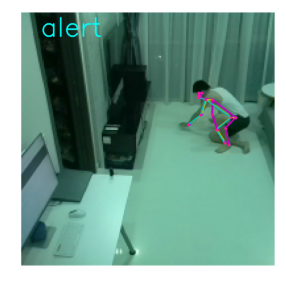

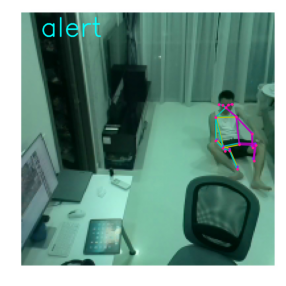

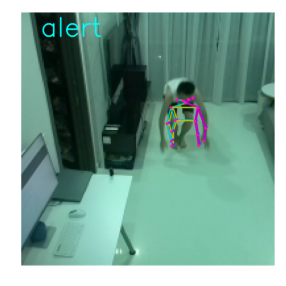

time: 1.12 s (started: 2023-04-09 11:33:51 +08:00)


In [5]:
label = 'alert'
random_files = np.random.choice(list(data[label]), 3)
for file in random_files:
    show_output_overlay(data, file, label, figsize=(5, 5))

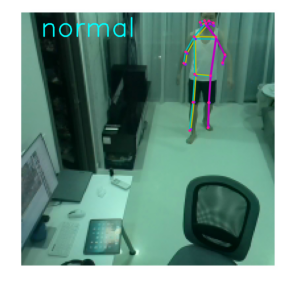

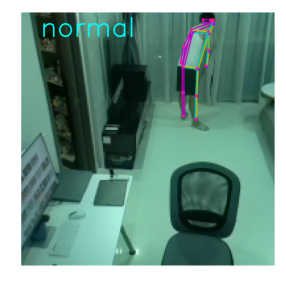

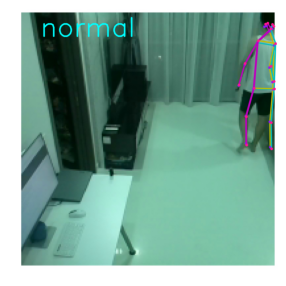

time: 1.33 s (started: 2023-04-09 11:33:56 +08:00)


In [6]:
label = 'normal'
random_files = np.random.choice(list(data[label]), 3)
for file in random_files:
    show_output_overlay(data, file, label, figsize=(5, 5))